<div style="background-color:#00000">
    <img src="https://fundacionsadosky.org.ar/wp-content/uploads/2022/08/logo.png" />
</div>
<div style="background-color:#03030a; margin:20px 40%">
    <img src="https://www.rfindustrial.com/wp-content/uploads/2023/04/cropped-1080x1080_Mesa-de-trabajo-1.png" />
</div>
<div style="background-color:#00000;">
    <img src="https://sinc.unl.edu.ar/wp-content/themes/sinci/img/sinc-logo.png" />
</div>

<p style="font-size: 30px">
    <strong>COPE - “Sistema inteligente de medición de nivel y control de velocidad de bombeo para pozos petrolíferos"</strong>
</p>

<p style="font-size: 20px">
    Objetivo del análisis: Evaluar modificaciones en los métodos de estimación de velocidad para poder realizar una estimación de la profundidad del pozo.
</p>

08/08/2023

In [41]:
import random
import numpy as np
from scipy import signal
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt
from glob import glob

import pandas as pd

import sys
sys.path.append("../") # go to parent dir

from src.methods.base import InitialEstimation, InitialEstimationHilbert, CepstrumEstimation
from src.methods import base_depth
from src.data.utils import load_sample_file
from src.data.utils import remove_saturation as remove_saturation_method
from src.methods.utils import get_input_signal

from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# Cálculo estimado de velocidad

In [2]:
ecometry_name = '../data/raw/8/_10_23_02_36_37__Frec1(301)_IncF(40)_Nciclos(5)_SwIn(1)_Down(32)_Nsamp)16000)/_Eco_02_36_37.json'
initial = InitialEstimation(remove_saturation=True)
estimated_speed = initial.predict(ecometry_name)
estimated_speed

450.60616890257313

# Cálculo estimado de profundidad

In [3]:
ecometry_name = '../data/raw/20_10_2021 ( pruebas tiro cuplas largo)/8/_10_22_23_47_09__Frec1(7)_IncF(1)_Nciclos(15)_SwIn(1)_Down(1024)_Nsamp)6000)/_Eco_23_47_09.json'

## Demodulacion AM básica

In [4]:
initial = base_depth.InitialEstimation()

### Sin eliminación de la saturación, sin correlación

In [5]:
df, output_signal = load_sample_file(ecometry_name)
removed_samples = 0

In [6]:
depth = initial.predict(output_signal,
                        df,
                        estimated_speed,
                        removed_samples,
                        use_correlation=False)
depth

346.8097646800088

### Con eliminación de la saturación, sin correlación

In [7]:
df, output_signal = load_sample_file(ecometry_name)
signal_len = len(output_signal)
output_signal = remove_saturation_method(output_signal)
removed_samples = signal_len - len(output_signal)

In [8]:
depth = initial.predict(output_signal,
                        df,
                        estimated_speed,
                        removed_samples,
                        use_correlation=False)
depth

1092.029030129756

### Sin eliminación de la saturación, con correlación

In [9]:
df, output_signal = load_sample_file(ecometry_name)
removed_samples = 0

In [10]:
depth = initial.predict(output_signal,
                        df,
                        estimated_speed,
                        removed_samples,
                        use_correlation=True)
depth

909.1972729272046

### Con eliminación de la saturación, con correlación

In [11]:
df, output_signal = load_sample_file(ecometry_name)
signal_len = len(output_signal)
output_signal = remove_saturation_method(output_signal)
removed_samples = signal_len - len(output_signal)

In [12]:
depth = initial.predict(output_signal,
                        df,
                        estimated_speed,
                        removed_samples,
                        use_correlation=True)
depth

909.1972729272046

## Demodulacion por Hilbert

In [13]:
hilbert = base_depth.InitialEstimationHilbert()

### Sin eliminación de saturación, sin correlación

In [14]:
df, output_signal = load_sample_file(ecometry_name)
removed_samples = 0

In [15]:
depth = hilbert.predict(output_signal, 
                        df,
                        estimated_speed=estimated_speed,
                        removed_samples=removed_samples,
                        use_correlation=False)
depth

500.36859467780954

### Con eliminación de saturación, sin correlación

In [16]:
df, output_signal = load_sample_file(ecometry_name)
signal_len = len(output_signal)
output_signal = remove_saturation_method(output_signal)
removed_samples = signal_len - len(output_signal)

In [17]:
depth = hilbert.predict(output_signal, 
                        df,
                        estimated_speed=estimated_speed,
                        removed_samples=removed_samples,
                        use_correlation=False)
depth

500.36859467780954

### Sin eliminación de saturación, con correlación

In [18]:
df, output_signal = load_sample_file(ecometry_name)
removed_samples = 0

In [19]:
depth = hilbert.predict(output_signal, 
                        df,
                        estimated_speed=estimated_speed,
                        removed_samples=removed_samples,
                        use_correlation=True)
depth

876.2032109082912

### Con eliminación de saturación, con correlación

In [20]:
df, output_signal = load_sample_file(ecometry_name)
signal_len = len(output_signal)
output_signal = remove_saturation_method(output_signal)
removed_samples = signal_len - len(output_signal)

In [21]:
depth = hilbert.predict(output_signal, 
                        df,
                        estimated_speed=estimated_speed,
                        removed_samples=removed_samples,
                        use_correlation=True)
depth

876.2032109082912

**Conclusiones parciales**

Se evidencia que en ambos casos la eliminación de la saturación es indistinta, siendo el factor que más pesa la utilización de la señal de correlación.

## Se prueba utilizando el valor real de velocidad

In [22]:
initial = base_depth.InitialEstimation()

df, output_signal = load_sample_file(ecometry_name)
signal_len = len(output_signal)
output_signal = remove_saturation_method(output_signal)
removed_samples = signal_len - len(output_signal)

depth = initial.predict(output_signal,
                        df,
                        401,
                        removed_samples,
                        use_correlation=True)
depth

809.1058924731182

In [23]:
initial = base_depth.InitialEstimationHilbert()

df, output_signal = load_sample_file(ecometry_name)
signal_len = len(output_signal)
output_signal = remove_saturation_method(output_signal)
removed_samples = signal_len - len(output_signal)

depth = initial.predict(output_signal,
                        df,
                        401,
                        removed_samples,
                        use_correlation=True)
depth

779.7440688172043

## Se prueba con otra ecometría/disparo:

In [24]:
ecometry_name_2 = '../data/raw/20_10_2021 ( pruebas tiro cuplas largo)/8/_10_22_23_47_09__Frec1(7)_IncF(1)_Nciclos(15)_SwIn(1)_Down(1024)_Nsamp)6000)/_Eco_23_48_32.json'

In [25]:
initial = base_depth.InitialEstimation()

df, output_signal = load_sample_file(ecometry_name_2)
signal_len = len(output_signal)
output_signal = remove_saturation_method(output_signal)
removed_samples = signal_len - len(output_signal)

depth = initial.predict(output_signal,
                        df,
                        estimated_speed,
                        removed_samples,
                        use_correlation=True)
depth

328.4521662634704

# Análisis de resultados intermedios

In [26]:
df, output_signal = load_sample_file(ecometry_name_2)
signal_len = len(output_signal)
output_signal = remove_saturation_method(output_signal)
removed_samples = signal_len - len(output_signal)

input_signal_values, _ = get_input_signal(df.Frec1,
                                          df.Down,
                                          df.IncF,
                                          df.Nciclos)
output_signal = signal.correlate(output_signal, input_signal_values)

# Remove input signal from correlation, plus an arbitrary number of samples.
output_signal = output_signal[len(input_signal_values) + 10:]

# Normalize.
output_signal_norm = output_signal / np.max(np.abs(output_signal))

# Compute signal frequency.
output_signal_sampling_freq = 930000 / df.Down

# Band-pass filter
fir_filter = signal.firwin(400 + 1, [5, 50], pass_zero=False,
                           fs=output_signal_sampling_freq)
output_signal_filtered = signal.lfilter(fir_filter, 1, output_signal_norm)

output_signal_abs = np.abs(output_signal_filtered)

# Filter signal.
b, a = signal.butter(10,
                     50,
                     btype='low',
                     analog=False,
                     fs=output_signal_sampling_freq)
output_signal_filtered_low_pass = signal.filtfilt(b, a, output_signal_abs)

# Compute peaks.
peaks_ix, peaks = signal.find_peaks(output_signal_filtered_low_pass,
                                    height=0.5,
                                    distance=500)
peaks = peaks['peak_heights']
peaks_ix = peaks_ix / output_signal_sampling_freq

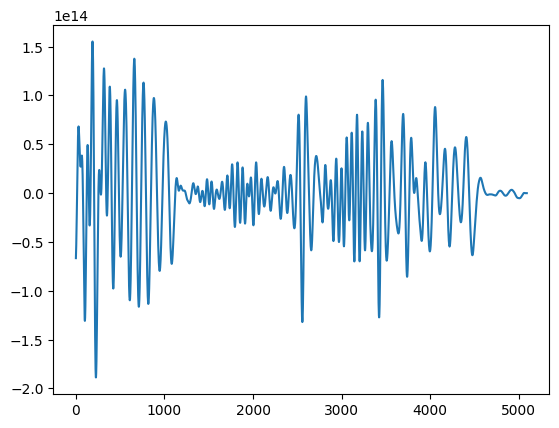

In [27]:
plt.plot(output_signal)

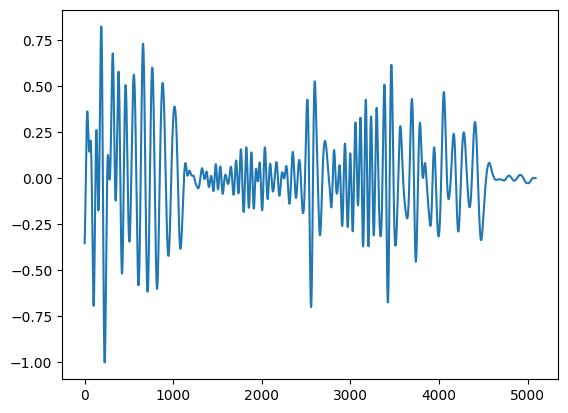

In [28]:
plt.plot(output_signal_norm)

In [29]:
np.argmax(output_signal_norm) / output_signal_sampling_freq * 393 / 2

40.675922580645164

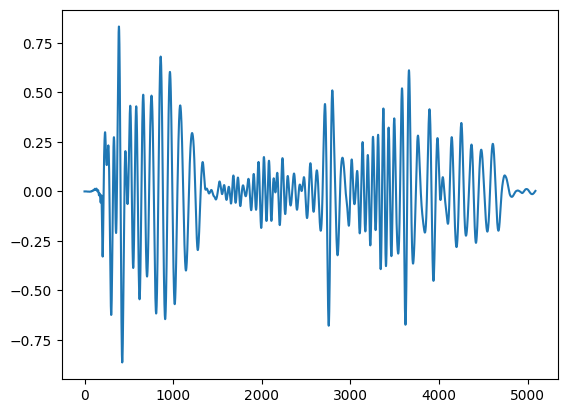

In [30]:
plt.plot(output_signal_filtered)

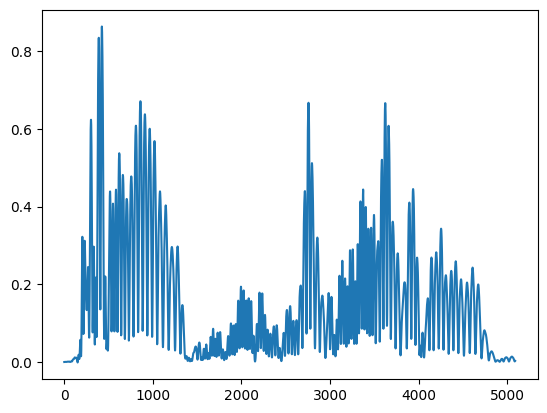

In [31]:
plt.plot(output_signal_filtered_low_pass)

# Se prueba con distintos disparos

In [32]:
!ls '../data/raw/20_10_2021 ( pruebas tiro cuplas largo)/8/_10_22_23_47_09__Frec1(7)_IncF(1)_Nciclos(15)_SwIn(1)_Down(1024)_Nsamp)6000)'

/Library/Developer/CommandLineTools/usr/bin/python3: No module named virtualfish
_Eco_23_47_09.json       _Eco_23_48_32.json       _Eco_23_50_09.json
_Eco_23_47_30.json       _Eco_23_48_53.json       _Eco_23_50_30.json_wrong
_Eco_23_47_50.json       _Eco_23_49_13.json
_Eco_23_48_11.json       _Eco_23_49_34.json


In [33]:
ecometry_trials = glob('../data/raw/20_10_2021 ( pruebas tiro cuplas largo)/8/_10_22_23_47_09__Frec1(7)_IncF(1)_Nciclos(15)_SwIn(1)_Down(1024)_Nsamp)6000)/*.json')

In [34]:
initial = base_depth.InitialEstimation()

depth = initial.predict_folder(ecometry_trials,
                               379,
                               use_correlation=True)
depth

Using 9 of 9 provided signals.


772.4362322580646

In [35]:
hilbert = base_depth.InitialEstimationHilbert()

depth = hilbert.predict_folder(ecometry_trials,
                               379,
                               use_correlation=True,
                               remove_saturation=True)
depth

Using 9 of 9 provided signals.


738.0083612903226

In [36]:
used_signal = 0
df_params = None
output_signal_mean = np.array([])
remove_saturation = False

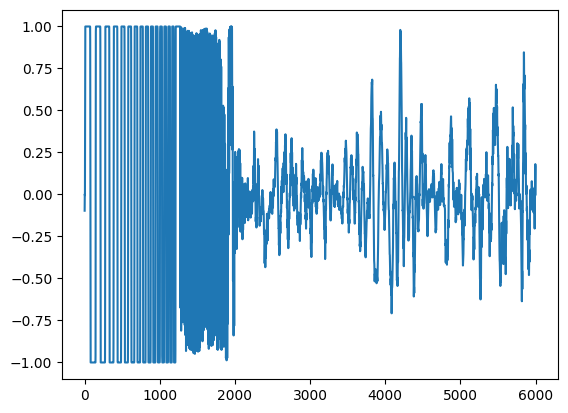

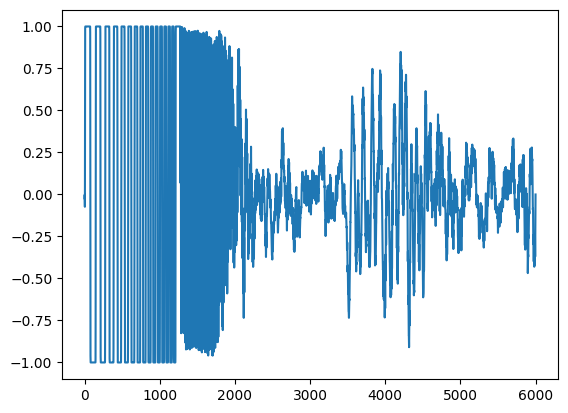

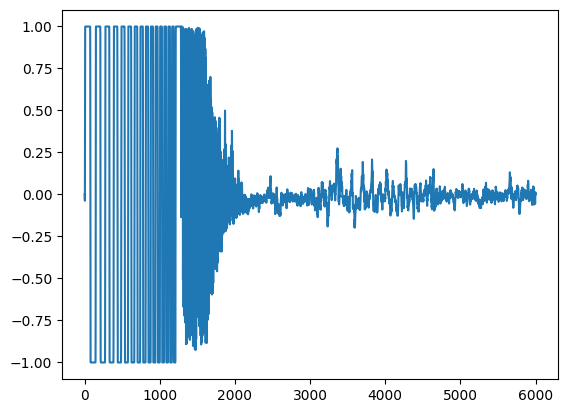

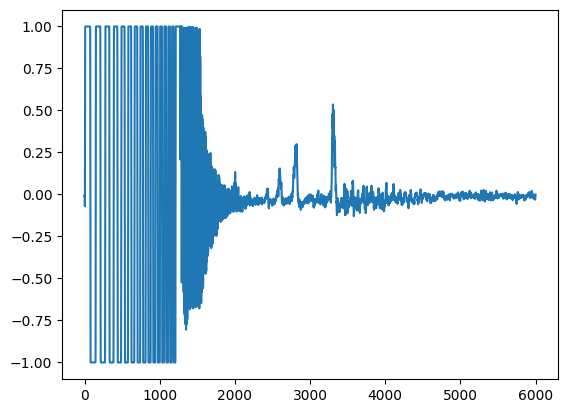

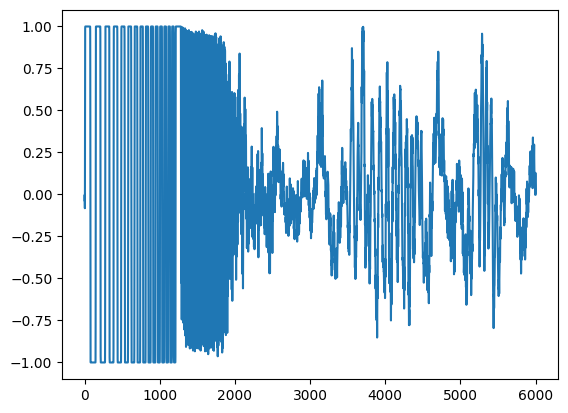

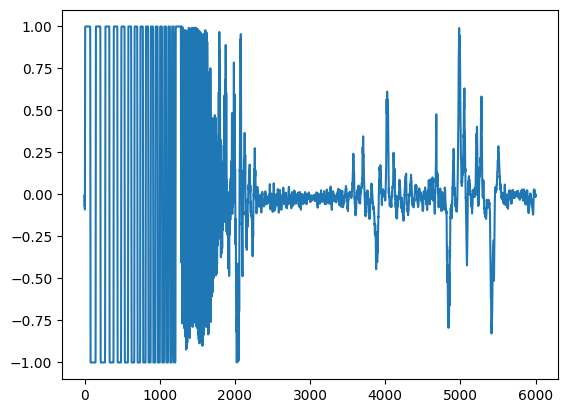

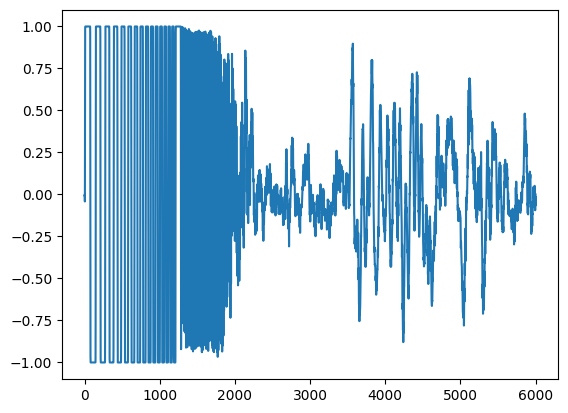

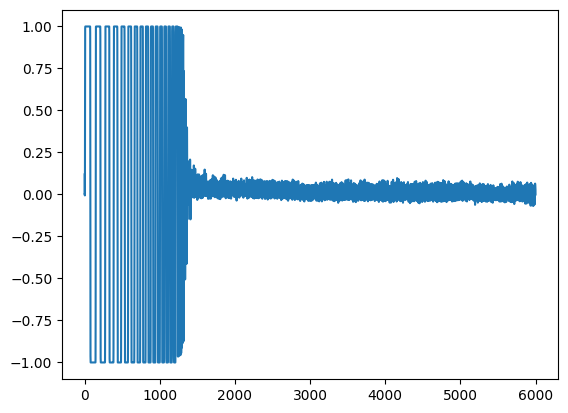

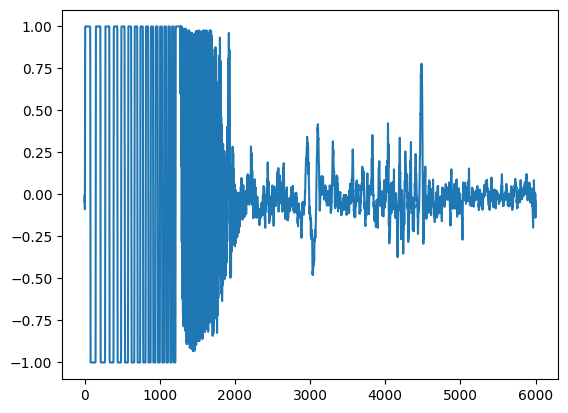

In [37]:
for ecometry_name in ecometry_trials:
    # Load signal.
    df_params, output_signal_original = load_sample_file(ecometry_name)
    output_signal_original = output_signal_original / np.max(output_signal_original)
    
    plt.plot(output_signal_original)
    plt.show()

    if len(output_signal_mean) < len(output_signal_original):
        result = output_signal_original.copy()
        result[:len(output_signal_mean)] += output_signal_mean
    else:
        result = output_signal_mean.copy()
        result[:len(output_signal_original)] += output_signal_original
    output_signal_mean = np.array(result.copy())
    used_signal += 1

In [38]:
output_signal_original = np.array(output_signal_mean) / used_signal

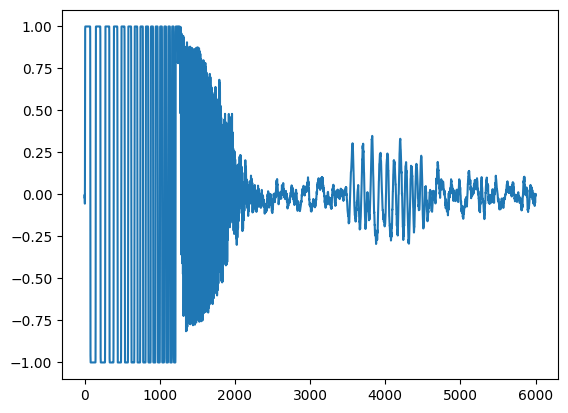

In [39]:
plt.plot(output_signal_original)

## Análisis de diferencias/cambios cuando se utilizan múltiples disparos

In [40]:
repetitions_number = 10

ecometry_trials = glob('../data/raw/20_10_2021 ( pruebas tiro cuplas largo)/8/_10_22_23_47_09__Frec1(7)_IncF(1)_Nciclos(15)_SwIn(1)_Down(1024)_Nsamp)6000)/*.json')

results = []

initial = base_depth.InitialEstimation()

for i in range(1, 10):
    for ii in range(repetitions_number):
        ecometry_trials_sample = random.sample(ecometry_trials, i)

        depth = initial.predict_folder(ecometry_trials_sample,
                                       379,
                                       use_correlation=True,
                                       remove_saturation=True)
        if depth is not None:
            results.append([i, ii, depth, abs(770.93 - depth)])
        else:
            results.append([i, ii, None])

Using 1 of 1 provided signals.
Using 1 of 1 provided signals.
Using 1 of 1 provided signals.
Using 1 of 1 provided signals.
Using 1 of 1 provided signals.
Using 1 of 1 provided signals.
Using 1 of 1 provided signals.
Using 1 of 1 provided signals.
Using 1 of 1 provided signals.
Using 1 of 1 provided signals.
Using 2 of 2 provided signals.
Using 2 of 2 provided signals.
Using 2 of 2 provided signals.
Using 2 of 2 provided signals.
Using 2 of 2 provided signals.
Using 2 of 2 provided signals.
Using 2 of 2 provided signals.
Using 2 of 2 provided signals.
Using 2 of 2 provided signals.
Using 2 of 2 provided signals.
Using 3 of 3 provided signals.
Using 3 of 3 provided signals.
Using 3 of 3 provided signals.
Using 3 of 3 provided signals.
Using 3 of 3 provided signals.
Using 3 of 3 provided signals.
Using 3 of 3 provided signals.
Using 3 of 3 provided signals.
Using 3 of 3 provided signals.
Using 3 of 3 provided signals.
Using 4 of 4 provided signals.
Using 4 of 4 provided signals.
Using 4 

In [42]:
df_results = pd.DataFrame(results, columns=['trials_number', 'repetition', 'depth', 'error'])

In [43]:
_df = df_results.dropna().groupby('trials_number').agg({'error': ['mean', 'std']})
_df.columns = ['error_mean', 'error_std']
_df

,error_mean,error_std
trials_number,,
1,4.889591,3.225742
2,4.918031,2.790852
3,2.593835,2.134580
4,1.529416,0.125385
5,2.575577,2.182132
6,1.997870,1.635256
7,1.401905,0.147540
8,1.464502,0.087976
9,1.506232,0.000000


# Se prueba con otro pozo

## Estimación de velocidad

In [44]:
ecometry_name_speed_w2 = '../data/raw/2/_10_23_02_09_57__Frec1(301)_IncF(40)_Nciclos(5)_SwIn(1)_Down(32)_Nsamp)16000)/_Eco_02_09_57.json'
initial = InitialEstimation(remove_saturation=True)
estimated_speed = initial.predict(ecometry_name_speed_w2)
estimated_speed

535.6617647058823

## Estimación de profundidad por distintos métodos

In [45]:
ecometry_name_depth_w2 = '../data/raw/20_10_2021 ( pruebas tiro cuplas largo)/2/_10_22_23_58_07__Frec1(7)_IncF(1)_Nciclos(15)_SwIn(1)_Down(1024)_Nsamp)6000)/_Eco_23_58_07.json'

In [46]:
initial = base_depth.InitialEstimation()

df, output_signal = load_sample_file(ecometry_name_depth_w2)
signal_len = len(output_signal)
output_signal = remove_saturation_method(output_signal)
removed_samples = signal_len - len(output_signal)

depth = initial.predict(output_signal,
                        df,
                        estimated_speed,
                        removed_samples,
                        use_correlation=True)
depth

In [47]:
initial = base_depth.InitialEstimationHilbert()

df, output_signal = load_sample_file(ecometry_name_depth_w2)
signal_len = len(output_signal)
output_signal = remove_saturation_method(output_signal)
removed_samples = signal_len - len(output_signal)

depth = initial.predict(output_signal,
                        df,
                        estimated_speed,
                        removed_samples,
                        use_correlation=True)
depth

In [48]:
df, output_signal = load_sample_file(ecometry_name_depth_w2)
signal_len = len(output_signal)
output_signal = remove_saturation_method(output_signal)
removed_samples = signal_len - len(output_signal)

input_signal_values, _ = get_input_signal(df.Frec1,
                                          df.Down,
                                          df.IncF,
                                          df.Nciclos)
output_signal = signal.correlate(output_signal, input_signal_values)

# Remove input signal from correlation, plus an arbitrary number of samples.
output_signal = output_signal[len(input_signal_values) + 10:]

# Normalize.
output_signal_norm = output_signal / np.max(np.abs(output_signal))

# Compute signal frequency.
output_signal_sampling_freq = 930000 / df.Down

# Band-pass filter
fir_filter = signal.firwin(400 + 1, [5, 50], pass_zero=False,
                           fs=output_signal_sampling_freq)
output_signal_filtered = signal.lfilter(fir_filter, 1, output_signal_norm)

output_signal_abs = np.abs(output_signal_filtered)

# Filter signal.
b, a = signal.butter(10,
                     50,
                     btype='low',
                     analog=False,
                     fs=output_signal_sampling_freq)
output_signal_filtered_low_pass = signal.filtfilt(b, a, output_signal_abs)

# Compute peaks.
peaks_ix, peaks = signal.find_peaks(output_signal_filtered_low_pass,
                                    height=0.5,
                                    distance=500)
peaks = peaks['peak_heights']
peaks_ix = peaks_ix / output_signal_sampling_freq

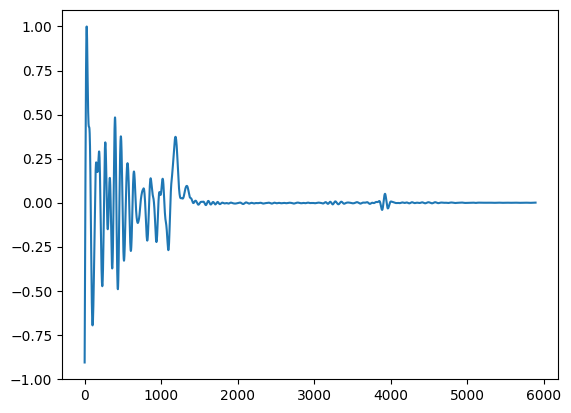

In [49]:
plt.plot(output_signal_norm)

### Se prueba con otra ecometría, mismo pozo y parámetros

In [50]:
ecometry_name_depth_w2 = '../data/raw/20_10_2021 ( pruebas tiro cuplas largo)/2/_10_23_00_06_38__Frec1(7)_IncF(1)_Nciclos(15)_SwIn(1)_Down(1024)_Nsamp)6000)/_Eco_00_06_38.json'
df, output_signal_original = load_sample_file(ecometry_name_depth_w2)
signal_len = len(output_signal)
output_signal = remove_saturation_method(output_signal_original)
removed_samples = signal_len - len(output_signal)

input_signal_values, _ = get_input_signal(df.Frec1,
                                          df.Down,
                                          df.IncF,
                                          df.Nciclos)
output_signal = signal.correlate(output_signal, input_signal_values)

# Remove input signal from correlation, plus an arbitrary number of samples.
output_signal = output_signal[len(input_signal_values) + 10:]

# Normalize.
output_signal_norm = output_signal / np.max(np.abs(output_signal))

# Compute signal frequency.
output_signal_sampling_freq = 930000 / df.Down

# Band-pass filter
fir_filter = signal.firwin(400 + 1, [5, 50], pass_zero=False,
                           fs=output_signal_sampling_freq)
output_signal_filtered = signal.lfilter(fir_filter, 1, output_signal_norm)

output_signal_abs = np.abs(output_signal_filtered)

# Filter signal.
b, a = signal.butter(10,
                     50,
                     btype='low',
                     analog=False,
                     fs=output_signal_sampling_freq)
output_signal_filtered_low_pass = signal.filtfilt(b, a, output_signal_abs)

# Compute peaks.
peaks_ix, peaks = signal.find_peaks(output_signal_filtered_low_pass,
                                    height=0.5,
                                    distance=500)
peaks = peaks['peak_heights']
peaks_ix = peaks_ix / output_signal_sampling_freq

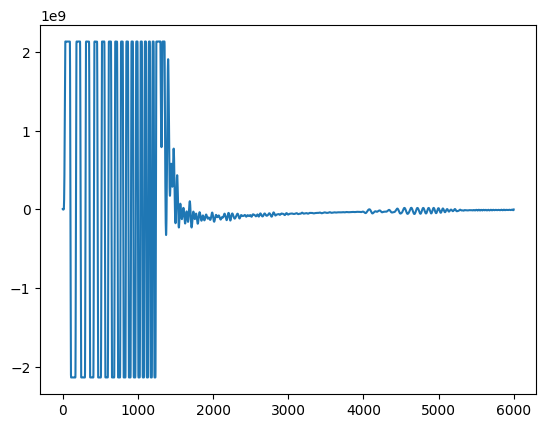

In [51]:
plt.plot(output_signal_original)

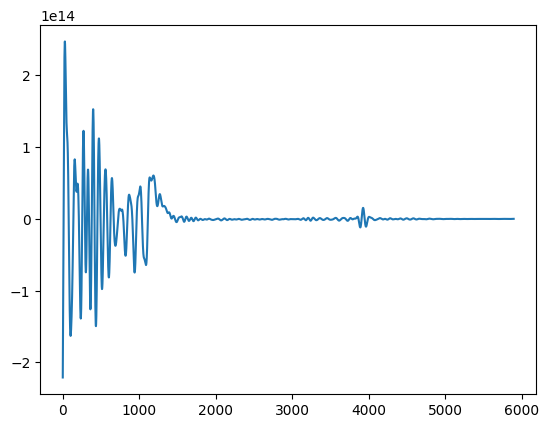

In [52]:
plt.plot(output_signal)

# Se prueba utilizando un cálculo de correlación insesgado

In [53]:
ecometry_name = '../data/raw/8/_10_23_02_36_37__Frec1(301)_IncF(40)_Nciclos(5)_SwIn(1)_Down(32)_Nsamp)16000)/_Eco_02_36_37.json'
initial = InitialEstimation(remove_saturation=True)
estimated_speed = initial.predict(ecometry_name)
estimated_speed

450.60616890257313

In [54]:
def xcorr(sig_a, sig_b):
    corr = signal.correlate(sig_a, sig_b)
    ixs = list(range(1, len(corr) // 2 + 1))

    if len(corr) % 2 == 0:
        ixs = ixs + ixs[::-1]
    else:
        ixs = ixs + [max(ixs) + 1] + ixs[::-1]
    
    corr = corr / ixs
    
    return corr

In [55]:
ecometry_name = '../data/raw/20_10_2021 ( pruebas tiro cuplas largo)/8/_10_22_23_47_09__Frec1(7)_IncF(1)_Nciclos(15)_SwIn(1)_Down(1024)_Nsamp)6000)/_Eco_23_47_09.json'

df_ecometry_params, output_signal_values = load_sample_file(ecometry_name)
removed_samples = 0

In [56]:
f1 = 5
f2 = 50
fir_filter_order = 400
low_pass_filter_order = 10
low_pass_cutoff = 50
peak_min_height = 0.5
peak_min_distance = 500

In [57]:
initial = base_depth.InitialEstimation()

In [58]:
input_signal_values, _ = get_input_signal(df_ecometry_params.Frec1,
                                          df_ecometry_params.Down,
                                          df_ecometry_params.IncF,
                                          df_ecometry_params.Nciclos)
output_signal_corr = xcorr(output_signal_values, input_signal_values)

# Remove input signal from correlation, plus an arbitrary number of samples.
output_signal = output_signal_corr[len(input_signal_values) + 10:]

# Normalize.
output_signal_norm = output_signal / np.max(np.abs(output_signal))

# Compute signal frequency.
output_signal_sampling_freq = 930000 / df_ecometry_params.Down

# Filter signal.
fir_filter = signal.firwin(fir_filter_order + 1, [f1, f2], pass_zero=False,
                           fs=output_signal_sampling_freq)
output_signal_filtered = signal.lfilter(fir_filter, 1, output_signal_norm)

# Get absolute value.
output_signal_abs = np.abs(output_signal_filtered)

# Apply a low-pass filter.
b, a = signal.butter(low_pass_filter_order,
                     low_pass_cutoff,
                     btype='low',
                     analog=False,
                     fs=output_signal_sampling_freq)
output_signal_filtered_low_pass = signal.filtfilt(b, a, output_signal_abs)

peaks_ix, peaks = initial.find_peaks(
    output_signal_filtered_low_pass,
    peak_min_height,
    peak_min_distance,
    output_signal_sampling_freq,
    removed_samples,
    estimated_speed)

if len(peaks_ix) > 0:
    max_ix_value = peaks_ix[np.argmax(peaks)]
    estimated_depth = max_ix_value * estimated_speed / 2
else:
    estimated_depth = None

print(estimated_depth)

None


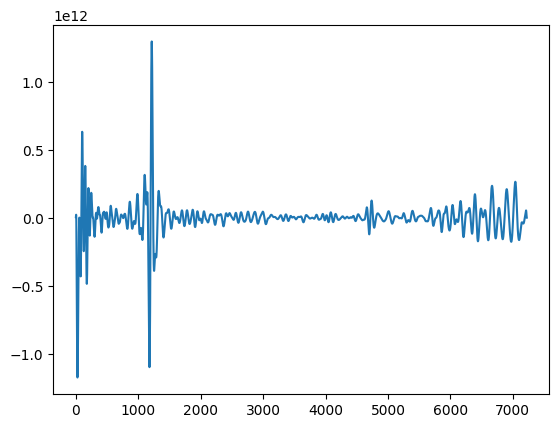

In [59]:
plt.plot(output_signal_corr)